In [1]:
"""
Estimate parameters of a normal distribution and draw ellipse
"""
import numpy as np
import matplotlib.pyplot as plt

# Create points in ellipse to show covariance
def ellipse_points(mean, cov, n_sd, n_pts):
    evals,EVecs=np.linalg.eig(cov)
    a=np.linspace(0,2*np.pi,n_pts)
    sd=n_sd*np.sqrt(evals)
    dx=np.zeros([2,n_pts])
    dx[0,:]=sd[0]*np.sin(a)
    dx[1,:]=sd[1]*np.cos(a)
    return (EVecs@dx).T + mean

Mean:  [1 2]
Covariance:  [[0.63995163 0.02423256]
 [0.02423256 0.02959589]]
Estimate of mean:  [1.00076243 1.98779684]
Estimate of cov:
 [[0.69105309 0.04909556]
 [0.04909556 0.03007446]]


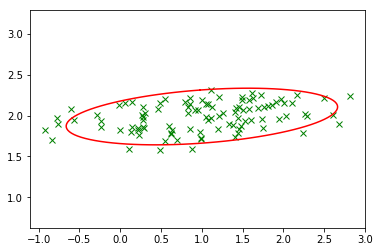

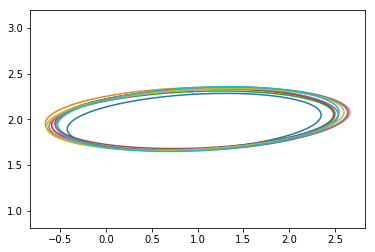

In [2]:
mean=np.array([1,2])

# Generate a random positive definite matrix
A=np.random.randn(2,2)
cov=A.T@A

print("Mean: ",mean)
print("Covariance: ",cov)

n=100
x=np.random.multivariate_normal(mean,cov,n)


# Estimate parameters
est_mean=x.mean(0)
print("Estimate of mean: ",est_mean)

# Variables are in columns, so rowvar=False
est_cov=np.cov(x,rowvar=False)
print("Estimate of cov:\n",est_cov)


p=ellipse_points(est_mean,est_cov,2.0,100)

plt.plot(x[:,0],x[:,1],"x",color="green")  
plt.plot(p[:,0],p[:,1],color="red")
plt.axis('equal')
plt.show()

# Task: 
# With a fixed covariance matrix, take n=100 samples, fit Gaussian 
# and show the ellipse.
# Repeat n_tries=10 times, superimposing the ellipses on the same graph.
# How does the scatter of ellipses change as n increases?
mean_error = np.array([])
for i in range(10):
    x=np.random.multivariate_normal(mean,cov,100*(i+1))
    est_mean=x.mean(0)
    est_cov=np.cov(x,rowvar=False)
    p=ellipse_points(est_mean,est_cov,2,1000)
    mean_error = np.append(mean_error,[est_mean - mean])
    # plt.plot(x[:,0],x[:,1],"x")  
    plt.plot(p[:,0],p[:,1])
    plt.axis('equal')
    # plt.title('n_iter = '+ np.str(i+1))
    
plt.show()   